<a href="https://colab.research.google.com/github/jakubmis1998/NeuralNetworks/blob/main/autoAsocjator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Auto asocjator

import keras.preprocessing.image as kpi
from matplotlib import pyplot as plt
import numpy as np

class PerceptronTrainer():
  def __init__(self, learning_rate, iterations):
    """
      Initialization of perceptron trainer.

      Args:
        learning_rate (float) - const learning rate.
        iterations (integer) - learning iterations amount.
    """
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.thetas = np.random.uniform(-1, 1, 2500)
    self.weights = np.random.uniform(-1, 1, (2500, 2500))
  
  def train(self, images, scratched_images):
    """
      Perceptron learning based on training and expected data.

      Args:
        images (NumPy array) - set of correct(expected) values (5 x 2500).
        scratched_images (NumPy array) - training data set (5 x 5 x 2500).
    """
    for i in range(self.iterations):
      image_type = np.random.randint(5)
      type_sample = np.random.randint(5)
      sample = scratched_images[image_type][type_sample]
      expected_value = images[image_type]

      O = self.predict(sample)
      ERR = expected_value - O

      local_life_time = np.zeros(2500)
      global_life_time = np.zeros(2500)
      best_weights = np.copy(self.weights)

      # if ERR != 0 for each perceptron
      indexes = np.where(ERR != 0)
      local_life_time[indexes] = 0
      self.weights[indexes] += self.learning_rate * ERR[indexes].reshape((len(indexes[0]), 1)) * sample
      self.thetas[indexes] -= self.learning_rate * ERR[indexes]

      # if ERR == 0 for each perceptron
      indexes = np.where(ERR == 0)
      local_life_time[indexes] += 1

      # if life time has increased for each perceptron
      indexes = np.where(global_life_time < local_life_time)
      global_life_time[indexes] = local_life_time[indexes]
      best_weights[indexes] = np.copy(self.weights[indexes])
  
    self.weights = np.copy(best_weights)

  def predict(self, sample):
    """
      Checks if given data returns expected value based on the learned perceptron.

      Args:
        sample (NumPy array): image.
    """
    O = np.sum(self.weights * sample, axis=1) - self.thetas
    return np.where(O >= 0, 1, -1)

def show_image(img):
  """Shows 2D image from NumPy array"""
  plt.imshow(img, cmap="gray")

def get_original_images():
  """Returns NumPy array with original images"""
  filenames = ['car.png', 'face.png', 'flower.png', 'mush.png', 'sun.png']
  images = np.array([])
  for filename in filenames:
    image = kpi.load_img(filename)  # Load image as NumPy array
    images = np.append(images, kpi.img_to_array(image)[:, :, 0])  # Only R canal
  images = images.reshape(5, 2500)  # 5 pictures 50px x 50px
  return np.where(images == 0, -1, 1)  # -1 - 1 values

def get_scratched_images():
  """Returns NumPy array with scratched images"""
  filenames = []
  for i in range(5):
    filenames.append('car_scratch_{}.png'.format(i+1))
  for i in range(5):
    filenames.append('face_scratch_{}.png'.format(i+1))
  for i in range(5):
    filenames.append('flower_scratch_{}.png'.format(i+1))
  for i in range(5):
    filenames.append('mush_scratch_{}.png'.format(i+1))
  for i in range(5):
    filenames.append('sun_scratch_{}.png'.format(i+1))

  images = np.array([])
  for filename in filenames:
    image = kpi.load_img(filename)  # Load image as NumPy array
    images = np.append(images, kpi.img_to_array(image)[:, :, 0])  # Only R canal
  images = images.reshape(5, 5, 2500)  # 5 rows with 5 pictures 50px x 50px
  return np.where(images == 0, -1, 1)  # -1 - 1 values

if __name__ == "__main__":

  perceptron_trainer = PerceptronTrainer(0.1, 100)
  images = get_original_images()
  scratched_images = get_scratched_images()

  perceptron_trainer.train(images, scratched_images)



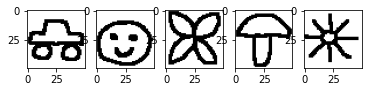

In [ ]:
# 5 original pictures
for i in range(5):
  plt.subplot(1, 5, i + 1)
  original = images[i].reshape(50, 50)
  show_image(original)

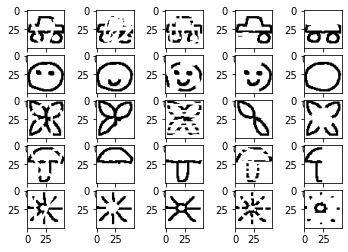

In [28]:
# 25 scratched pictures, 5 for each type
for i in range(25):
  plt.subplot(5, 5, i + 1)
  scratched = scratched_images.reshape(25, 2500)[i].reshape(50, 50)
  show_image(scratched)

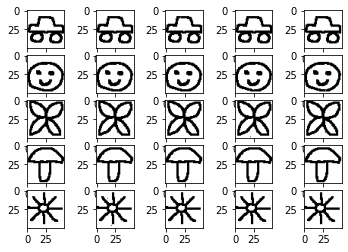

In [31]:
# 25 predicted pictures, 5 for each type
for i in range(25):
  plt.subplot(5, 5, i + 1)
  predict = perceptron_trainer.predict(scratched_images.reshape(25, 2500)[i]).reshape(50, 50)
  show_image(predict)